In [1]:
import numpy as np
import json
from labelme import utils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import cv2
from os import listdir
from os.path import isfile, join

from skimage import color
from skimage import io

In [2]:
mypath = "C:\\Users\\jross\\OneDrive\\Data Analytics\\Machine Learning\\Project\\Project Data\\Labeled France Potholes\\"
DATADIR = "C:\\Users\\jross\\OneDrive\\Data Analytics\\Machine Learning\\Project\\training"
DATADIR2 = "C:\\Users\\jross\\Downloads\\datasets"
count = 0

In [3]:
import os

path = '.'
class_num = []
IMG_SIZE = 28

In [4]:
'''
Path should contain a Directory full of directories for labelme tool
Returns the training data and labels for the labeled images
resized as 28 x 28
'''
def create_training_data(path, IMG_SIZE=None, color=None):
    training_data = []
    training_labels = []
    for file in os.listdir(path):
        file_array = []
        for file2 in os.listdir(os.path.join(path,file)):
            file_array.append(file2)
            if(file2=="label_names.txt"):
                with open(os.path.join(path,file,file2)) as f:
                    data_per_file = []
                    next(f)
                    for line in f:
                        data_per_file.append(line)
                    training_labels.append(data_per_file)
            if(file2 =="label_viz.png"):
                if color == True:
                    img_array = cv2.imread(os.path.join(path,file,file2),-1)
                else:
                    img_array = cv2.imread(os.path.join(path,file,file2),0)
                if IMG_SIZE == None:
                    training_data.append([img_array])
                else:
                    new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                    training_data.append([new_array])
        if 'label_names.txt' not in file_array:
            print(file)
    return training_data, training_labels

In [5]:
#Get training data
training_data, training_labels = create_training_data(DATADIR, 28)
training_data_2, training_labels_2 = create_training_data(DATADIR2, 28)

In [6]:
#combine the training data and training labels
training_data.extend(training_data_2)
training_labels.extend(training_labels_2)

In [7]:
#create numpy arrays
np_training_data = np.array(training_data)
np_training_labels = np.array(training_labels)
print(np_training_data.shape)

(351, 1, 28, 28)


In [8]:
np_training_data = np_training_data[:,0,:,:]
np_training_data = np_training_data.reshape(len(np_training_data), 784)

In [9]:
#accepts a list of jpg images and returns 
#pictures in grayscale
def to_grayscale(pictures):
    gray_pictures = []
    for x in pictures:
        gray_pictures.append(color.rgb2gray(x))
        return gray_pictures

In [10]:
#build random_forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=17)

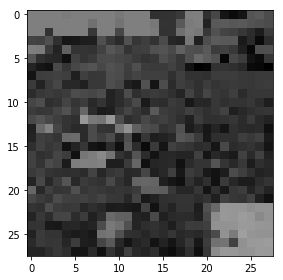

In [11]:
#image of our 28x28 data set
io.imshow(np_training_data[0].reshape(28,28))
io.show()

In [12]:
np_classes = np.array(training_labels)
for i in range(0, len(np_classes)):
    np_classes[i] = np.array(np_classes[i])

In [13]:
def shape_array(array, max_len):
    for i in range(0, len(array)):
        while(len(array[i]) < max_len):
            array[i] = np.append(array[i], [0])
    return array

In [14]:
np_classes = shape_array(np_classes, 3)

In [15]:
print(np_classes[0])
print(np_classes.shape)

['1\n' '2\n' '3\n']
(351,)


In [16]:
#classes have unwanted '\n character'
def remove_char(data):
    for d in data:
        for i in range(0, len(d)):
            d[i] = d[i].rstrip('\n')

In [17]:
remove_char(training_labels)
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=['0', '1','2','3'])
mlb_label_train = mlb.fit_transform(training_labels)

In [18]:
random_forest.fit(np_training_data, mlb_label_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=17, verbose=0, warm_start=False)

In [19]:
print(random_forest.score(np_training_data, mlb_label_train))
print(mlb.classes_)

1.0
['0' '1' '2' '3']


In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, np_training_data, mlb_label_train, scoring='accuracy', cv=10)

In [21]:
scores

array([0.41666667, 0.4       , 0.42857143, 0.34285714, 0.37142857,
       0.42857143, 0.31428571, 0.31428571, 0.48571429, 0.42857143])

In [22]:
'''
The previous data was resized to 28 x 28 and this does not provide enough data for the model to learn with
'''
def obtain_data(path):
    training_data = []
    training_labels = []
    for file in os.listdir(path):
        file_array = []
        for file2 in os.listdir(os.path.join(path,file)):
            file_array.append(file2)
            if(file2=="label_names.txt"):
                with open(os.path.join(path,file,file2)) as f:
                    data_per_file = []
                    next(f)
                    for line in f:
                        data_per_file.append(line)
                    training_labels.append(data_per_file)
            if(file2 =="label_viz.png"):
                    img_array = cv2.imread(os.path.join(path,file,file2),0)
                    new_array = cv2.resize(img_array,(112,112))
                    training_data.append([new_array])
        if 'label_names.txt' not in file_array:
            print(file)
    return training_data, training_labels

In [23]:
#Get training data
training_data, training_labels = create_training_data(DATADIR, 112)
training_data_2, training_labels_2 = create_training_data(DATADIR2, 112)

In [24]:
#combine the training data and training labels
training_data.extend(training_data_2)
training_labels.extend(training_labels_2)

In [25]:
#create numpy arrays
#since the pictures in the array are filled with different pixel sizes, only the first 2 dimensions are shown
np_training_data = np.array(training_data)
np_training_labels = np.array(training_labels)
print(np_training_data.shape)

(351, 1, 112, 112)


In [26]:
np_training_data[0][0].shape

(112, 112)

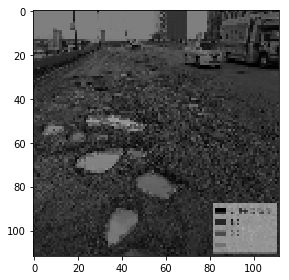

In [27]:
#The image is now much more clear
io.imshow(np_training_data[0][0])

In [28]:
np_training_labels[0]

['1\n', '2\n', '3\n']

In [29]:
remove_char(np_training_labels)

In [30]:
np_training_labels[0]

['1', '2', '3']

In [31]:
def two_to_one(np_array):
    return_array = []
    for image in np_array:
        return_array.append(image[0].reshape(len(image[0]) * len(image[0][0])))
    return_array = np.array(return_array)    
    return return_array

#print(np_training_data[0][0].shape)
#print(np_training_data[0][0].reshape(len(np_training_data[0][0]) * len(np_training_data[0][0][0])).shape)
#print(np_training_data[0][0].reshape(2808000).shape)
#print(len(np_training_data[0][0]) * len(np_training_data[0][0][0]))

In [32]:
new_np_training_data = two_to_one(np_training_data)

In [33]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=17)

In [34]:
mlb_2 = MultiLabelBinarizer(classes=['0','1','2','3'])
mlb_label_train_2 = mlb.fit_transform(training_labels)

In [35]:
def get_max_dimensions(np_array):
    dim_1 = [len(dem[0]) for dem in np_array]
    dim_2 = [len(dem[0][0]) for dem in np_array]
    return max(dim_1), max(dim_2)
#print(new_np_training_data.shape)
#random_forest.fit(new_np_training_data, mlb_label_train_2)

In [36]:
dim_1, dim_2 = get_max_dimensions(np_training_data)
print(dim_1, dim_2)

112 112


In [37]:
random_forest.fit(new_np_training_data, mlb_label_train_2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=17, verbose=0, warm_start=False)

In [38]:
scores = cross_val_score(random_forest, new_np_training_data, mlb_label_train_2, scoring='accuracy', cv=10)

In [39]:
scores

array([0.41666667, 0.37142857, 0.54285714, 0.31428571, 0.28571429,
       0.28571429, 0.28571429, 0.31428571, 0.42857143, 0.45714286])

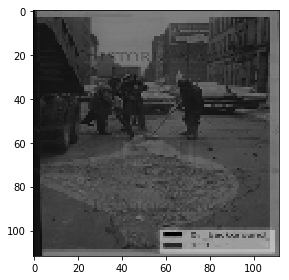

In [40]:
io.imshow(np_training_data[4][0])

In [41]:
random_forest = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=17)

In [42]:
random_forest.fit(new_np_training_data, mlb_label_train_2)
scores = cross_val_score(random_forest, new_np_training_data, mlb_label_train_2, scoring='accuracy', cv=10)
scores

array([0.38888889, 0.4       , 0.48571429, 0.37142857, 0.34285714,
       0.34285714, 0.31428571, 0.28571429, 0.42857143, 0.42857143])

In [43]:
def get_min_dimensions(np_array):
    dim_1 = [len(dem[0]) for dem in np_array]
    dim_2 = [len(dem[0][0]) for dem in np_array]
    return min(dim_1), min(dim_2)

In [44]:
dim_1, dim_2 = get_min_dimensions(np_training_data)
print(dim_1, dim_2)

112 112


In [45]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=30)

In [46]:
random_forest.fit(new_np_training_data, mlb_label_train_2)
scores = cross_val_score(random_forest, new_np_training_data, mlb_label_train_2, scoring='accuracy', cv=10)
scores

array([0.38888889, 0.4       , 0.54285714, 0.34285714, 0.34285714,
       0.37142857, 0.31428571, 0.31428571, 0.42857143, 0.37142857])

In [47]:
training_data, training_labels = create_training_data(DATADIR)
training_data_2, training_labels_2 = create_training_data(DATADIR2)
training_data.extend(training_data_2)
training_labels.extend(training_labels_2)
np_training_data = np.array(training_data)
np_training_labels = np.array(training_labels)

In [48]:
remove_char(np_training_labels)
np_training_labels[0]

['1', '2', '3']

In [49]:
del(training_data)
del(training_labels)
del(training_data_2)
del(training_labels_2)

In [50]:
dim_1, dim_2 = get_max_dimensions(np_training_data)

In [51]:
print(dim_1, dim_2)

3648 5472


In [52]:
np_training_data.shape

(351, 1)

In [53]:
np_training_data = np_training_data[:,0]

some_array[0][0][0]

In [54]:
np_training_data.shape

(351,)

In [55]:
dim_1s = np.array([len(image) for image in np_training_data])
dim_2s = np.array([len(image[0]) for image in np_training_data])

[WARNING] 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points. (_axes.py:4217)
[WARNING] 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points. (_axes.py:4217)


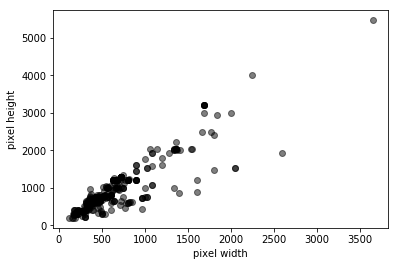

In [56]:
plt.scatter(dim_1s, dim_2s, c=(0,0,0), alpha=.5)
plt.xlabel('pixel width')
plt.ylabel('pixel height')
plt.show()

In [57]:
print(int(dim_1s.mean()))
print(dim_2s.mean())
l = np.zeros((4, 3))
print(l.shape)
l.resize(4, 10)
print(l.shape)

640
933.7606837606837
(4, 3)
(4, 10)


In [58]:
def normalize_pixels(np_array, color=None):
    array_return = []
    dim_1s = np.array([len(image) for image in np_array])
    dim_2s = np.array([len(image[0]) for image in np_array])
    x = int(dim_1s.mean())
    y = int(dim_2s.mean())
    print(x, y)
    for image in np_array:
        if color == True:
            array_return.append(cv2.resize(image, (x, y, 3)))
        else:
            array_return.append(cv2.resize(image, (x, y)))
    return np.array(array_return)

(1404, 2000)


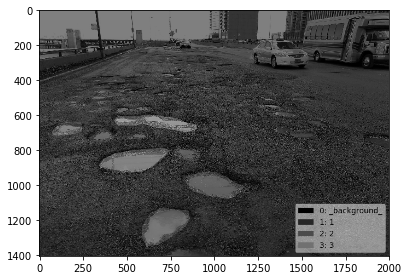

In [59]:
print(np_training_data[0].shape)
io.imshow(np_training_data[0])

In [60]:
np_training_data[1][0].shape

(720,)

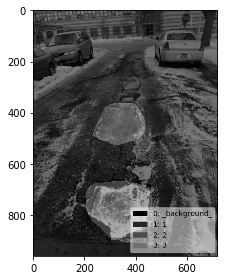

In [61]:
io.imshow(np_training_data[1])

In [62]:
np_training_data.shape

(351,)

In [63]:
np_training = normalize_pixels(np_training_data)
np_training.shape  

640 933


(351, 933, 640)

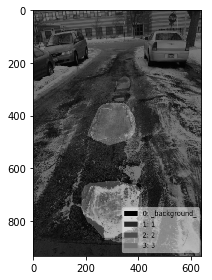

In [64]:
io.imshow(np_training[1])

In [65]:
random_forest.fit(np_training.reshape(351, 597120), mlb_label_train_2)
scores = cross_val_score(random_forest, np_training.reshape(351, 597120), mlb_label_train_2, scoring='accuracy', cv=10)
scores

array([0.47222222, 0.42857143, 0.45714286, 0.34285714, 0.4       ,
       0.4       , 0.34285714, 0.28571429, 0.45714286, 0.51428571])

In [66]:
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

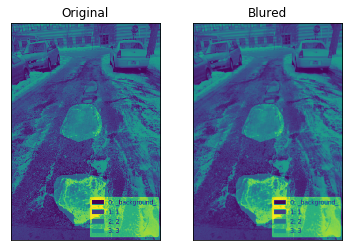

In [67]:
no_noise = []
for i in range(len(np_training)):
    blur = cv2.GaussianBlur(np_training[i], (5, 5), 0)
    no_noise.append(blur)

original = np_training[1]
image = no_noise[1]
display(original, image, 'Original', 'Blured')

In [68]:
#create numpy arrays
#since the pictures in the array are filled with different pixel sizes, only the first 2 dimensions are shown
#Get training data
training_data, training_labels = create_training_data(DATADIR, color=True)
training_data_2, training_labels_2 = create_training_data(DATADIR2, color=True)
#combine the training data and training labels
training_data.extend(training_data_2)
training_labels.extend(training_labels_2)
#create numpy arrays
#since the pictures in the array are filled with different pixel sizes, only the first 2 dimensions are shown
np_training_data = np.array(training_data)
np_training_labels = np.array(training_labels)
print(np_training_data.shape)

(351, 1)


In [69]:
image = np_training_data[0][:][0]

In [70]:
image.shape

(1404, 2000, 3)

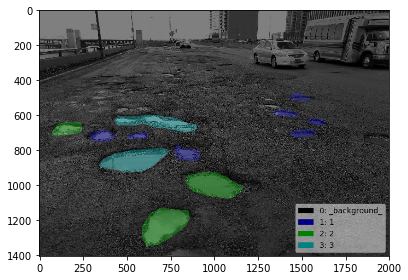

In [71]:
io.imshow(image)

In [72]:
np_training_data.shape

(351, 1)

In [73]:
np_training_data = np_training_data[:,0]
np_training_data.shape

(351,)

In [74]:
np_training = normalize_pixels(np_training_data)

640 933


In [75]:
np_training.shape

(351, 933, 640, 3)

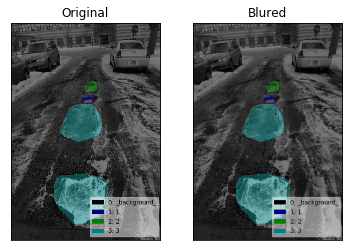

In [76]:
no_noise = []
for i in range(len(np_training)):
    blur = cv2.GaussianBlur(np_training[i], (5, 5), 0)
    no_noise.append(blur)

original = np_training[1]
image = no_noise[1]
display(original, image, 'Original', 'Blured')

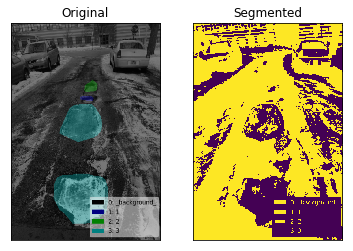

In [77]:
# Segmentation
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Displaying segmented images
display(original, thresh, 'Original', 'Segmented')

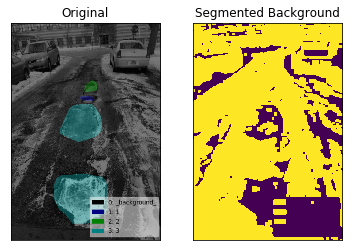

In [78]:
# Further noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

#Displaying segmented back ground
display(original, sure_bg, 'Original', 'Segmented Background')

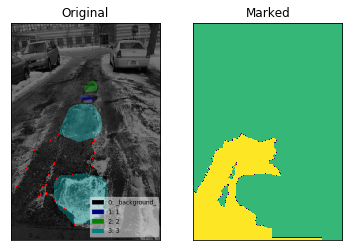

In [79]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]

# Displaying markers on the image
display(image, markers, 'Original', 'Marked')

In [80]:
DATADIR = "C:\\Users\\jross\\OneDrive\\Data Analytics\\Machine Learning\\Project\\Data\\TrainingSet257"

In [81]:
training_data, training_labels = create_training_data(DATADIR)

In [82]:
np_training_data = np.array(training_data)
np_training_labels = np.array(training_labels)
np_training_data.shape

(713, 1)

In [83]:
remove_char(np_training_labels)

In [84]:
np_training_data = np_training_data[:,0]

In [85]:
np_training = normalize_pixels(np_training_data)

707 996


In [86]:
for i in range(0, len(np_training_labels)):
    for j in range(0, len(np_training_labels[i])):
        if np_training_labels[i][j] == 'cracked_road':
            np_training_labels[i][j] = '1'
        elif np_training_labels[i][j] == 'notpothole':
            np_training_labels[i][j] = '0'
        elif np_training_labels[i][j] == 'pothole':
            np_training_labels[i][j] = '2'
        elif np_training_labels[i][j] == '3':
            np_training_labels[i][j] = '2'
        else:
            continue
mlb = MultiLabelBinarizer(classes=['0', '1','2'])
mlb_label_train = mlb.fit_transform(np_training_labels)

In [87]:
mlb.classes_

array(['0', '1', '2'], dtype=object)

In [88]:
np_training = np_training.reshape(713, 704172)
random_forest.fit(np_training, mlb_label_train)
scores = cross_val_score(random_forest, np_training, mlb_label_train, scoring='accuracy', cv=10)

In [89]:
scores

array([0.88888889, 0.93055556, 0.875     , 0.88732394, 0.83098592,
       0.87323944, 0.81690141, 0.92957746, 0.95774648, 0.94366197])

In [91]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
pred = cross_val_predict(random_forest, np_training.reshape(713, 704172), mlb_label_train, cv = 3)

NameError: name 'mlb_train' is not defined

In [111]:
from sklearn.metrics import f1_score
f1score = f1_score(pred, mlb_label_train, average=None)

In [112]:
f1score

array([0.        , 0.68907563, 0.97402597])

In [116]:
neg_train_data, neg_labels = create_training_data('C:\\Users\\jross\\OneDrive\\Data Analytics\\Machine Learning\\Project\\Project Data\\Negative Labels\\folder')

In [120]:
remove_char(neg_labels)
neg_labels[0]

['0']

In [121]:
np_neg_labels = np.array(neg_labels)

In [122]:
np_training_data.shape

(713,)

In [124]:
np_neg_train_data = np.array(neg_train_data)
np_neg_train_data.shape

(66, 1)

In [ ]:
np_neg_labels = np_neg_labels[:, 0]
np.append(np_training_data, np_neg)